<a href="https://colab.research.google.com/github/Armel-Kalala/Grammy-award-work/blob/main/Armel_pratique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANALYSE EXPLORATOIRE DE DONNEES

In [ ]:
# importation de bibliotheque
import pandas as pd
import numpy as np
import  sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from google.colab import drive
import plotly.express as px
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# telechargement du dataset
train_data = pd.read_csv("/content/drive/My Drive/KALALA/KDDTrain_filtered.csv")
test_data = pd.read_csv("/content/drive/My Drive/KALALA/KDDTest_filtered.csv")

In [ ]:
# combinaison train_data et test_data dans un seul DataFrame appelé data
data = pd.concat([train_data, test_data], ignore_index=True)

In [ ]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119863,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,smurf
119864,0,tcp,smtp,SF,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal
119865,0,tcp,http,SF,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal
119866,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back


In [ ]:
# la dimension du dataset
data.shape

(119868, 42)

In [ ]:
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'level'])
data.columns = columns

In [ ]:
# données manquantes
data.isnull()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119863,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
119864,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
119865,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
119866,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# sommention de données manquantes
data.isnull().sum

<bound method DataFrame.sum of         duration  protocol_type  service   flag  src_bytes  dst_bytes   land  \
0          False          False    False  False      False      False  False   
1          False          False    False  False      False      False  False   
2          False          False    False  False      False      False  False   
3          False          False    False  False      False      False  False   
4          False          False    False  False      False      False  False   
...          ...            ...      ...    ...        ...        ...    ...   
119863     False          False    False  False      False      False  False   
119864     False          False    False  False      False      False  False   
119865     False          False    False  False      False      False  False   
119866     False          False    False  False      False      False  False   
119867     False          False    False  False      False      False  False   

        wrong_fragment  urgent    hot  ...  dst_host_srv_count  \
0                False   False  False  ...               False   
1                False   False  False  ...               False   
2                False   False  False  ...               False   
3                False   False  False  ...               False   
4                False   False  False  ...               False   
...                ...     ...    ...  ...                 ...   
119863           False   False  False  ...               False   
119864           False   False  False  ...               False   
119865           False   False  False  ...               False   
119866           False   False  False  ...               False   
119867           False   False  False  ...               False   

        dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                        False                   False   
1                        False                   False   
2                        False                   False   
3                        False                   False   
4                        False                   False   
...                        ...                     ...   
119863                   False                   False   
119864                   False                   False   
119865                   False                   False   
119866                   False                   False   
119867                   False                   False   

        dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                             False                        False   
1                             False                        False   
2                             False                        False   
3                             False                        False   
4                             False                        False   
...                             ...                          ...   
119863                        False                        False   
119864                        False                        False   
119865                        False                        False   
119866                        False                        False   
119867                        False                        False   

        dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                      False                     False                 False   
1                      False                     False                 False   
2                      False                     False                 False   
3                      False                     False                 False   
4                      False                     False                 False   
...                      ...                       ...                   ...   
119863                 False                     False                 False   
119864                 False                     False       

In [ ]:
# traitement des valeurs manquantes
data.isnull().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


In [ ]:
# fonction d'aide pour une analyse plus approfondie
def unique_values(data, columns):
    """Prints unique values and their counts for specific columns in the DataFrame."""

    for column_name in columns:
        print(f"Column: {column_name}\n{'-'*30}")
        unique_vals = data[column_name].unique()
        value_counts = data[column_name].value_counts()
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
        print(f"Value Counts:\n{value_counts}\n{'='*40}\n")

In [ ]:
# valeurs unique des variables catégorielles
cat_features = data.select_dtypes(include='object').columns
unique_values(data, cat_features)

Column: protocol_type
------------------------------
Unique Values (3): ['tcp' 'udp' 'icmp']

Value Counts:
protocol_type
tcp     94807
udp     16883
icmp     8178
Name: count, dtype: int64

Column: service
------------------------------
Unique Values (12): ['ftp_data' 'other' 'private' 'http' 'eco_i' 'telnet' 'finger' 'domain_u'
 'smtp' 'ecr_i' 'ftp' 'pop_3']

Value Counts:
service
http        48178
private     25825
domain_u     9936
smtp         7944
ftp_data     7649
other        4892
eco_i        4586
telnet       3827
ecr_i        3592
finger       1750
pop_3        1019
ftp           670
Name: count, dtype: int64

Column: flag
------------------------------
Unique Values (10): ['SF' 'S0' 'REJ' 'RSTR' 'RSTO' 'S1' 'RSTOS0' 'SH' 'S3' 'S2']

Value Counts:
flag
SF        85426
S0        19507
REJ       10403
RSTR       2604
RSTO        848
S1          343
S3          292
SH          226
S2          137
RSTOS0       82
Name: count, dtype: int64

Column: level
-------------------------

In [ ]:
data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'level'],
      dtype='object')

In [ ]:
# les iformation appropos du dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119868 entries, 0 to 119867
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     119868 non-null  int64  
 1   protocol_type                119868 non-null  object 
 2   service                      119868 non-null  object 
 3   flag                         119868 non-null  object 
 4   src_bytes                    119868 non-null  int64  
 5   dst_bytes                    119868 non-null  int64  
 6   land                         119868 non-null  int64  
 7   wrong_fragment               119868 non-null  int64  
 8   urgent                       119868 non-null  int64  
 9   hot                          119868 non-null  int64  
 10  num_failed_logins            119868 non-null  int64  
 11  logged_in                    119868 non-null  int64  
 12  num_compromised              119868 non-null  int64  
 13 

In [ ]:
# statique du dataset
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,119868.000000,1.198680e+05,1.198680e+05,119868.000000,119868.000000,119868.000000,119868.000000,119868.000000,119868.000000,119868.000000,...,119868.000000,119868.000000,119868.000000,119868.000000,119868.000000,119868.000000,119868.000000,119868.000000,119868.000000,119868.000000
mean,311.931458,3.011873e+04,2.026966e+04,0.000058,0.023242,0.000083,0.041871,0.004522,0.480787,0.310149,...,171.593444,143.409317,0.637020,0.081931,0.169681,0.034391,0.171287,0.165250,0.115704,0.113458
std,2583.447380,4.125625e+06,4.121944e+06,0.007642,0.262304,0.012917,0.541586,0.072471,0.499633,24.738590,...,101.909732,109.561758,0.428268,0.201832,0.326619,0.110635,0.366171,0.365983,0.296562,0.307553
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,61.000000,17.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.620000e+02,9.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,167.000000,0.970000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,3.000000e+02,9.440000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.060000,0.100000,0.020000,0.010000,0.000000,0.000000,0.000000
max,54451.000000,1.167519e+09,1.309937e+09,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# identification de doublons
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
119863,True
119864,False
119865,False
119866,False


In [ ]:
# compter les doublons
data.duplicated().sum()

np.int64(426)

In [ ]:
data["protocol_type"].isnull().sum()

np.int64(0)

In [ ]:
# affichage de données manquante
data.isnull().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


In [ ]:
# visualisation de données
data.head(20)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune
6,0,tcp,private,S0,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
7,0,tcp,private,S0,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune
8,0,tcp,private,S0,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune
9,0,tcp,private,REJ,0,0,0,0,0,0,...,12,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune


<function matplotlib.pyplot.show(close=None, block=None)>

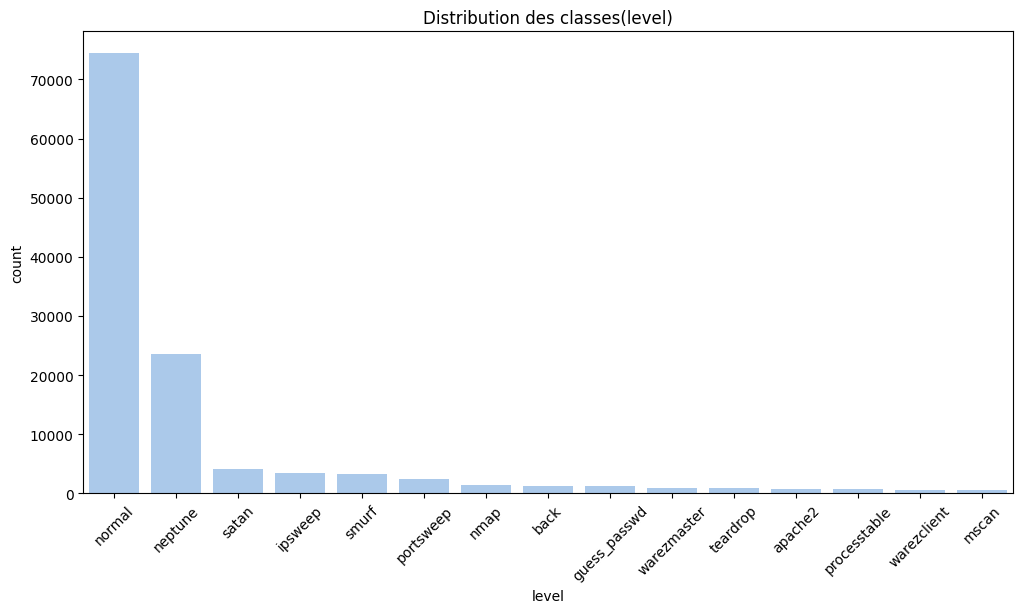

In [ ]:
# représentation du label
plt.figure(figsize=(12,6))
sns.set_palette("pastel")
sns.countplot(data=data, x="level", order=data["level"].value_counts().index)
plt.title("Distribution des classes(level)")
plt. xticks(rotation=45)
plt.show

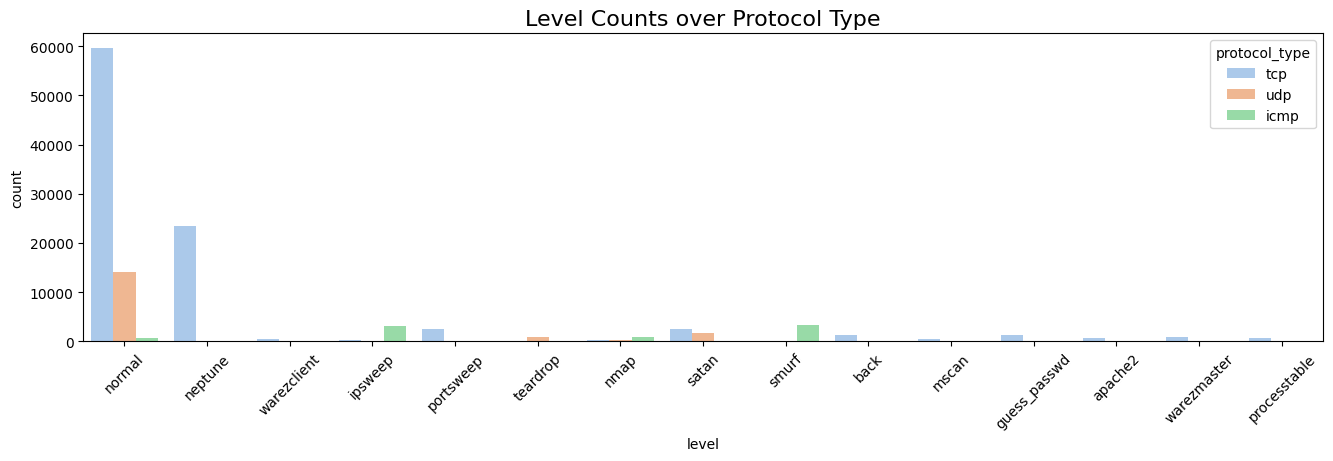

In [ ]:
# la distribution des classes sur le type de protocole (tcp, udp et icmp)
plt.figure(figsize=(16,4))
sns.countplot(x='level',data=data,hue='protocol_type')
plt.xticks(rotation=45)
plt.title('Level Counts over Protocol Type',fontdict={'fontsize':16})
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119868 entries, 0 to 119867
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     119868 non-null  int64  
 1   protocol_type                119868 non-null  object 
 2   service                      119868 non-null  object 
 3   flag                         119868 non-null  object 
 4   src_bytes                    119868 non-null  int64  
 5   dst_bytes                    119868 non-null  int64  
 6   land                         119868 non-null  int64  
 7   wrong_fragment               119868 non-null  int64  
 8   urgent                       119868 non-null  int64  
 9   hot                          119868 non-null  int64  
 10  num_failed_logins            119868 non-null  int64  
 11  logged_in                    119868 non-null  int64  
 12  num_compromised              119868 non-null  int64  
 13 

In [ ]:
# variable categorielles
categorical_columns=data.nunique()[data.nunique() < 5000 ].keys().to_list()
categorical_columns

['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'level']

<ipython-input-30-52effefde940>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


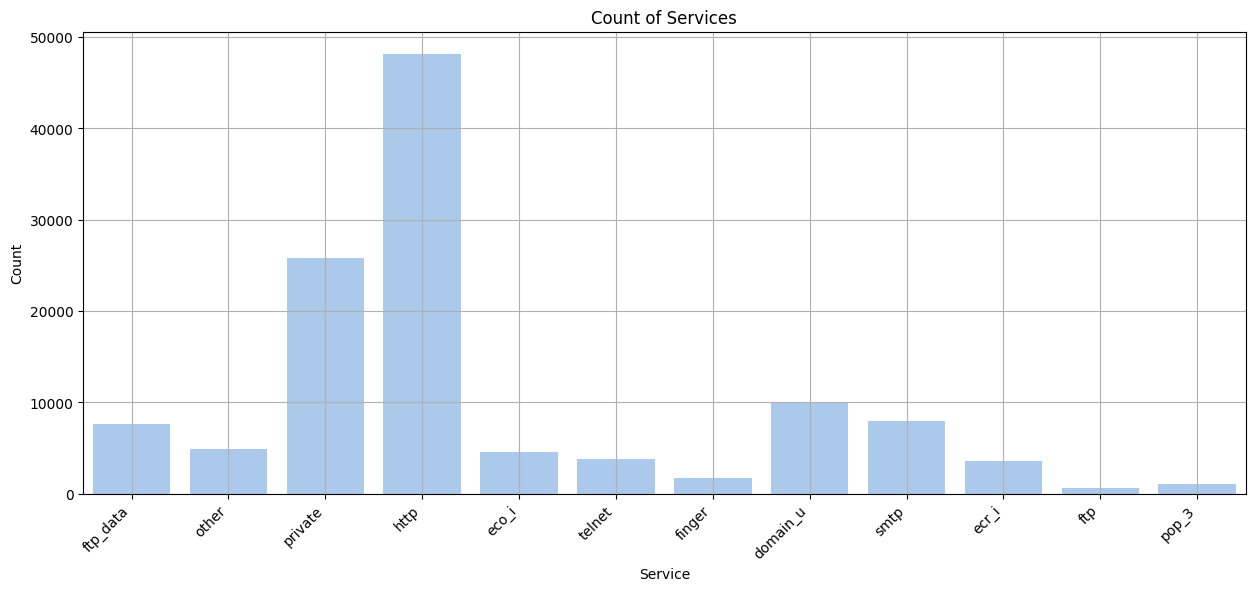

In [ ]:
# nombre de services
plt.figure(figsize=(15, 6))
ax = sns.countplot(x='service', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Count of Services')
plt.grid(True)
plt.show()

<ipython-input-31-2240ecfb709d>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


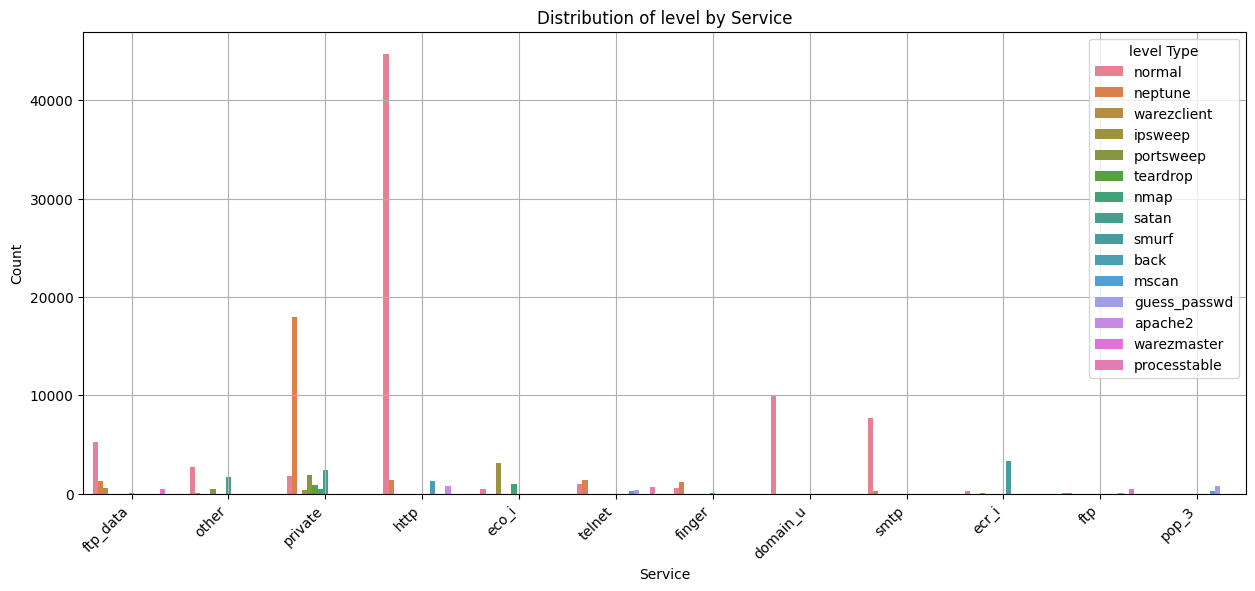

In [ ]:
# la distribution des classes par service
plt.figure(figsize=(15, 6))
ax = sns.countplot(x='service', hue='level', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Distribution of level by Service')
plt.legend(title='level Type')
plt.grid(True)
plt.show()

In [ ]:
data.isnull().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


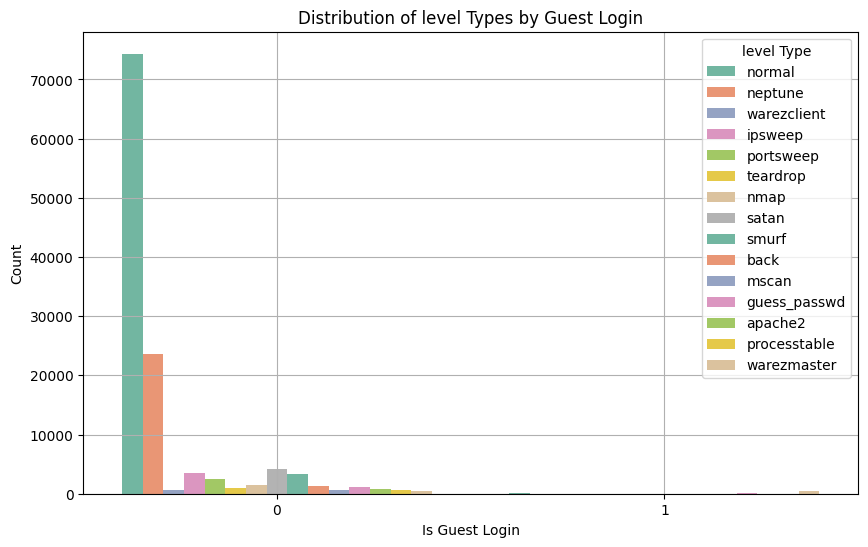

In [ ]:
# répartition des types de distribution des classes par connexion invitée
plt.figure(figsize=(10, 6))
sns.countplot(x='is_guest_login', hue='level', data=data, palette='Set2')
plt.xlabel('Is Guest Login')
plt.ylabel('Count')
plt.title('Distribution of level Types by Guest Login')
plt.legend(title='level Type')
plt.grid(True)
plt.show()

# APPRENTISSAGE AUTOMATIQUE

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
import numpy as np

import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, LabelEncoder
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

In [ ]:
# imputation ou suppression (selon le contexte)
num_imputer = SimpleImputer(strategy='median')  # Pour les colonnes numériques
cat_imputer = SimpleImputer(strategy='most_frequent')  # Pour les colonnes catégorielles

In [ ]:
# séparer les colonnes numériques et catégorielles
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = data.select_dtypes(include=['object', 'category']).columns.tolist()

In [ ]:
# la colonne cible pour uniformiser
train_data.rename(columns={"label": "level"}, inplace=True)
test_data.rename(columns={"label": "level"}, inplace=True)

In [ ]:
# fusionner pour encodage cohérent
train_data["is_train"] = 1
test_data["is_train"] = 0
full_data = pd.concat([train_data, test_data], ignore_index=True)

In [ ]:
# encodage des colonnes catégorielles (object)
cat_cols = full_data.select_dtypes(include="object").columns
encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    full_data[col] = le.fit_transform(full_data[col])
    encoders[col] = le

In [ ]:
# séparation après encodage
train_data = full_data[full_data["is_train"] == 1].drop(columns=["is_train"])
test_data = full_data[full_data["is_train"] == 0].drop(columns=["is_train"])

In [ ]:
# définition des X et y
X_train = train_data.drop("level", axis=1)
y_train = train_data["level"]

X_test = test_data.drop("level", axis=1)
y_test = test_data["level"]

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5)

In [ ]:
# Calculate the mean and standard deviation of the training scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

In [ ]:

# Calculate the mean and standard deviation of the validation scores
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

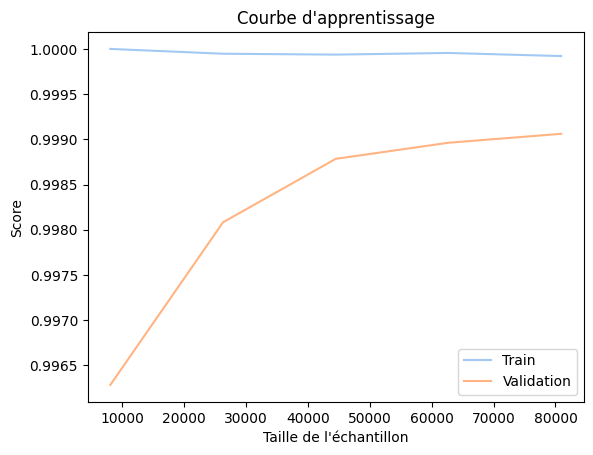

In [ ]:
plt.plot(train_sizes, train_scores_mean, label="Train")
plt.plot(train_sizes, test_scores_mean, label="Validation")
plt.xlabel("Taille de l'échantillon")
plt.ylabel("Score")
plt.legend()
plt.title("Courbe d'apprentissage")
plt.show()

In [ ]:
# entraînement du modèle
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# prédictions
y_pred = model.predict(X_test)

In [ ]:
# evaluation
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Précision globale sur les données test : {accuracy:.2f} %\n")
print("Rapport de classification :")
print(classification_report(y_test, y_pred, digits=4))


Précision globale sur les données test : 76.39 %

Rapport de classification :
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000       737
           1     0.8301    0.9666    0.8932       359
           2     0.0000    0.0000    0.0000      1231
           4     0.0000    0.0000    0.0000       580
           5     0.9643    0.9981    0.9809      3219
           7     0.7045    0.9767    0.8185      9567
           8     0.0000    0.0000    0.0000         0
           9     0.0000    0.0000    0.0000       685
          10     0.8188    1.0000    0.9004       723
          11     0.9852    1.0000    0.9925       665
          12     0.0000    0.0000    0.0000         0
          13     0.0000    0.0000    0.0000         0
          14     0.0000    0.0000    0.0000       944

    accuracy                         0.7639     18710
   macro avg     0.3310    0.3801    0.3527     18710
weighted avg     0.6087    0.7639    0.6745     18710



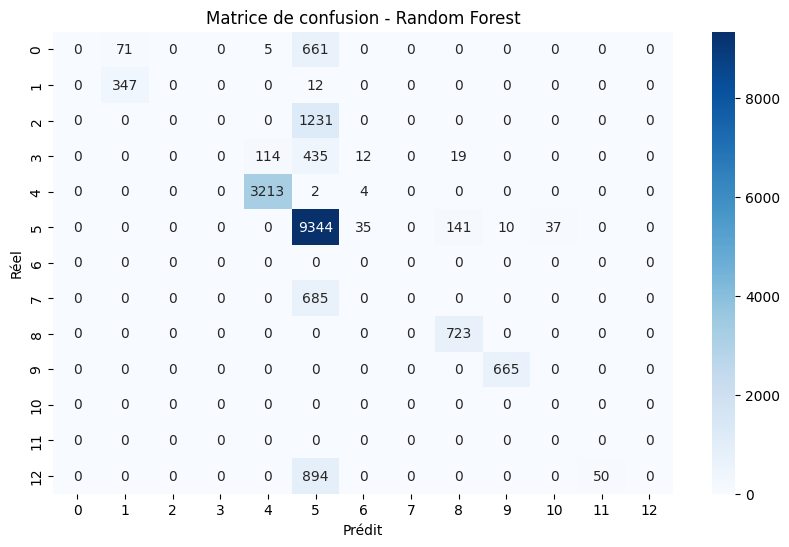

In [ ]:
# matrice de confusion
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion - Random Forest")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
labels = list(range(0, 15))  # classes de 0 à 14

In [ ]:
print(classification_report(y_test, y_pred, labels=labels, zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       737
           1       0.83      0.97      0.89       359
           2       0.00      0.00      0.00      1231
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00       580
           5       0.96      1.00      0.98      3219
           6       0.00      0.00      0.00         0
           7       0.70      0.98      0.82      9567
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00       685
          10       0.82      1.00      0.90       723
          11       0.99      1.00      0.99       665
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00       944

    accuracy                           0.76     18710
   macro avg       0.29      0.33      0.31     18710
weighted avg       0.61   

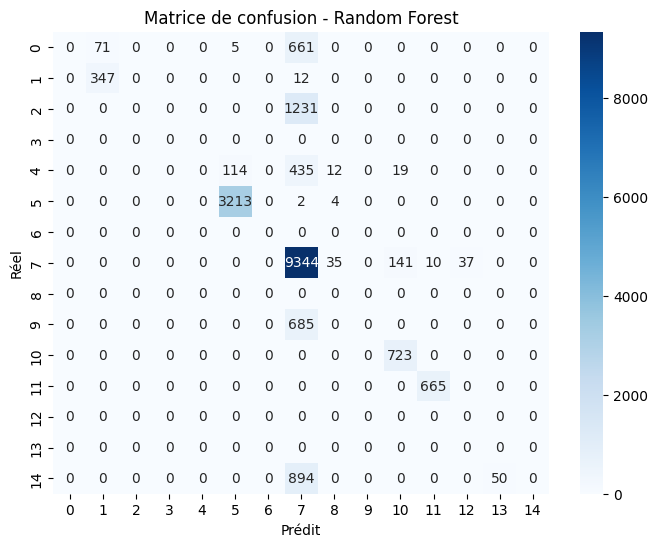

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Pour afficher joliment la matrice
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de confusion - Random Forest')
plt.show()

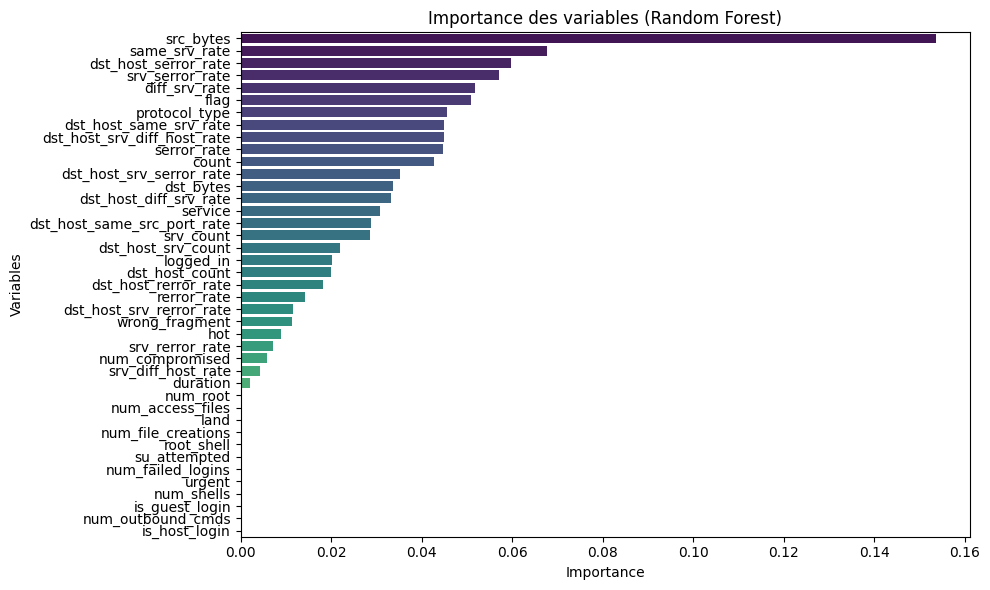

In [ ]:
# importance des variables
plt.figure(figsize=(10, 6))
# Get feature importances from the trained model
feat_imp = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feat_imp.values, y=feat_imp.index, palette='viridis')
plt.title("Importance des variables (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()

In [ ]:
# Binariser la variable cible pour la courbe ROC
y_test_binary = label_binarize(y_test, classes=np.unique(y_test))

In [ ]:
# calculer la courbe ROC
if y_test_binary.shape[1] > 1:
    y_test_binary = y_test_binary[:, 0]


try:
    y_scores = model.predict_proba(X_test)[:, 1]
except IndexError:
    y_scores = model.predict_proba(X_test)[:, 0]

fpr, tpr, _ = roc_curve(y_test_binary, y_scores)
roc_auc = auc(fpr, tpr)

In [ ]:
# Binariser la variable cible pour chaque classe
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

In [ ]:
# Calculer les courbes ROC pour chaque classe
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], model.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

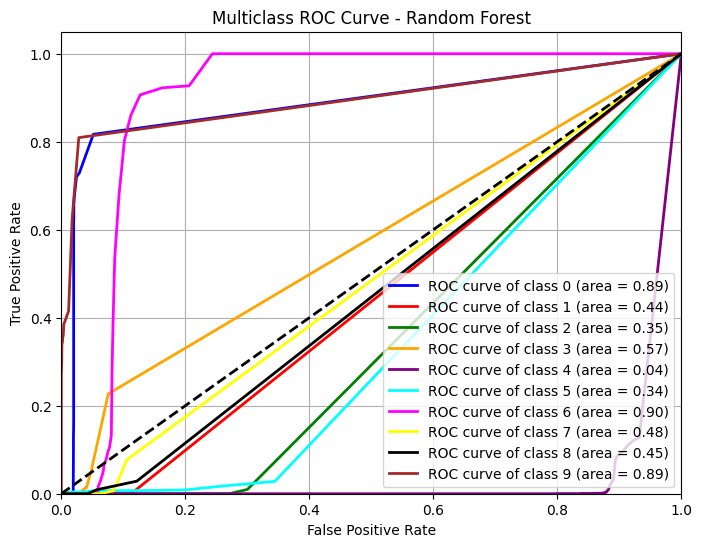

In [ ]:
# Tracer les courbes ROC pour chaque classe
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'black', 'brown', 'pink', 'gray', 'olive', 'darkblue', 'darkred']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
# heatmap de correlation
plt.figure(figsize=(15, 12))

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

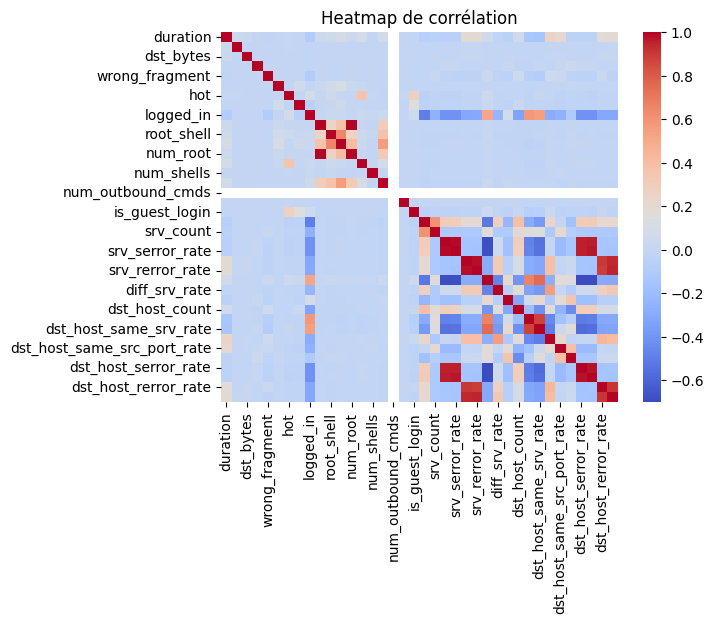

In [ ]:
numeric_data = data.select_dtypes(include=np.number)
sns.heatmap(numeric_data.corr(), cmap="coolwarm", annot=False)
plt.title("Heatmap de corrélation")
plt.show()
